In [131]:
%matplotlib inline
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
from glob import glob
from keras.models import load_model

Using TensorFlow backend.


In [2]:
data_path = "/d1/dgagne/spatial_storm_results_20171220/"

In [135]:
scores = ["auc", "bss"]
models = ["conv_net", "logistic_mean", "logistic_gan", "logistic_pca"]
imp_scores = {}
for model in models:
    imp_scores[model] = {}
    for score in scores:
        score_files = sorted(glob(data_path + "var_importance_{0}_{1}_*.csv".format(model, score)))
        imp_score_list = []
        for score_file in score_files:
            imp_data = pd.read_csv(score_file, index_col="Index")
            imp_score_list.append(((imp_data.iloc[0,0] - imp_data.loc[1:]) / imp_data.iloc[0,0] * 100).mean(axis=0))
        imp_scores[model][score] = pd.concat(imp_score_list, axis=1).T
        imp_scores[model][score].columns = imp_scores[model][score].columns.str.rstrip("_prev"
                                                                    ).str.replace("_", " "
                                                                    ).str.replace("-component of", ""
                                                                    ).str.replace("dew point temperature", "dew point")

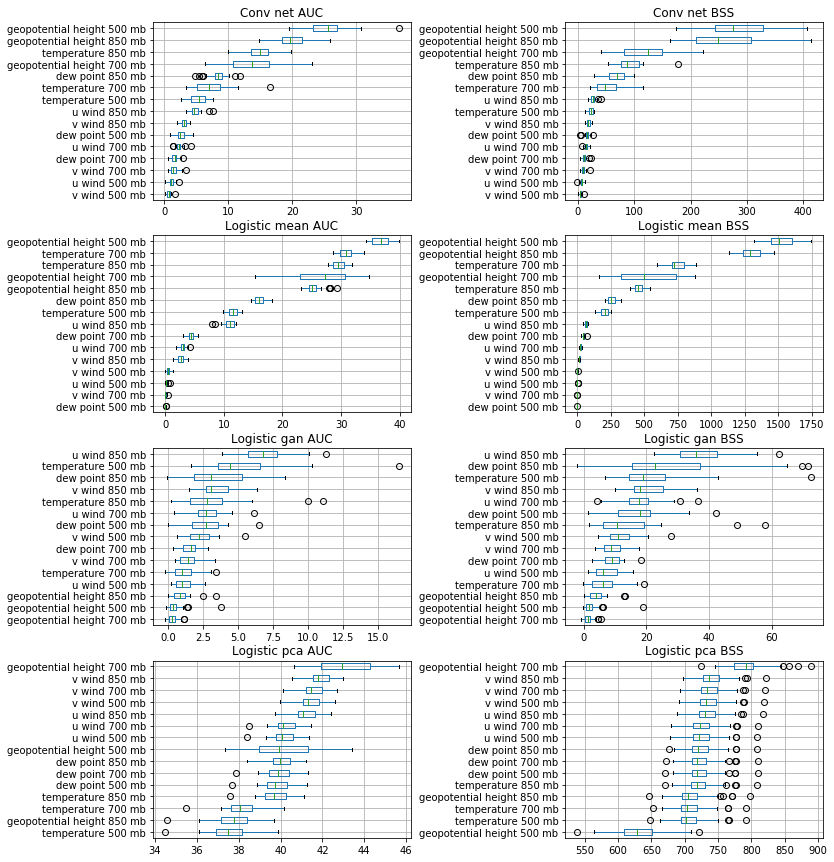

In [136]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
plt.subplots_adjust(wspace=0.6)
for m, model in enumerate(models):
    for s, score in enumerate(scores):
        rankings = imp_scores[model][score].mean(axis=0).sort_values().index
        imp_scores[model][score].loc[:, rankings].boxplot(ax=axes[m,s], vert=False)
        axes[m, s].set_title(model.replace("_", " ").capitalize() + " " + score.upper())
plt.savefig("var_imp_box.png", dpi=300, bbox_inches="tight")

In [137]:
mean_imp_matrix = pd.DataFrame(index=imp_scores["conv_net"]["bss"].columns, columns=models, dtype=float)
mean_imp_rank_matrix = pd.DataFrame(index=imp_scores["conv_net"]["bss"].columns, columns=models, dtype=int)
for model in models:
    mean_imp_matrix.loc[:, model] = imp_scores[model]["bss"].values.mean(axis=0)
    rank = np.argsort(imp_scores[model]["bss"].values.mean(axis=0))
    for r in range(rank.size):
        mean_imp_rank_matrix.loc[mean_imp_rank_matrix.index[rank[r]], model] = rank.size - r


In [93]:
mean_imp_matrix["conv_net"].values[np.argsort(mean_imp_matrix["conv_net"].values)]

array([  0.68831654,   1.13451656,   1.44212821,   1.55460714,
         2.2877488 ,   2.57388041,   3.05342006,   4.78460331,
         5.16755414,   7.18191937,   8.33550156,  13.72857337,
        14.8664198 ,  19.72752819,  25.62117955])

In [138]:
mean_imp_rank_matrix

,conv_net,logistic_mean,logistic_gan,logistic_pca
geopotential height 500 mb,1,1,14,15
geopotential height 700 mb,3,4,15,1
geopotential height 850 mb,2,2,13,12
temperature 500 mb,8,7,3,14
temperature 700 mb,6,3,12,13
temperature 850 mb,4,5,7,11
dew point 500 mb,10,15,6,10
dew point 700 mb,12,9,10,9
dew point 850 mb,5,6,2,8
u wind 500 mb,14,13,11,7


In [94]:
np.argsort(mean_imp_matrix["conv_net"].values)

array([12,  9, 13,  7, 10,  6, 14, 11,  3,  4,  8,  1,  5,  2,  0])

In [105]:
np.argsort(mean_imp_matrix["conv_net"].values)

array([12,  9, 13,  7, 10,  6, 14, 11,  3,  4,  8,  1,  5,  2,  0])

In [99]:
np.argsort(np.arange(10)[::-1].astype(float))

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [132]:
cnn = load_model("/d1/dgagne/spatial_storm_results_20171220/hail_conv_net_sample_003.h5")

In [133]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        12032     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
__________